In [29]:
import os
import time
import numpy as np
import renom as rm
from tqdm import tqdm

import matplotlib.pyplot as plt

from renom_img.api.segmentation.fcn import FCN8s
from renom_img.api.utility.distributor.distributor import ImageDistributor
from renom_img.api.utility.augmentation import Augmentation
from renom_img.api.utility.augmentation.process import *
from renom_img.api.utility.misc.display import draw_segment
#from renom_img.api.utility.evaluate import EvaluatorSegmentation

from renom.cuda import set_cuda_active
set_cuda_active(True)
from PIL import Image
%matplotlib inline

In [30]:
class_map = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 
             'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
             'dog', 'horse', 'motorbike', 'person', 'potted plant', 
             'sheep', 'sofa', 'train', 'tv/monitor']

In [31]:
prefix_path = '/media/hdd2/jun/dataset/VOCdevkit/VOC2012/'

In [32]:
train_image_path_list = []
train_annotation_path_list = []

with open(os.path.join(prefix_path, 'ImageSets', 'Segmentation', 'train.txt')) as f:
    txt = f.readlines()
    txt = [line.split('\n')[0] for line in txt]
    for i in range(len(txt)):
        train_image_path_list.append(os.path.join(prefix_path, 'JPEGImages', txt[i]+'.jpg'))
        train_annotation_path_list.append(os.path.join(prefix_path, 'SegmentationClass', txt[i]+'.png'))
                                          
valid_image_path_list = []
valid_annotation_path_list = []

with open(os.path.join(prefix_path, 'ImageSets', 'Segmentation', 'val.txt')) as f:
    txt = f.readlines()
    txt = [line.split('\n')[0] for line in txt]
    for i in range(len(txt)):
        valid_image_path_list.append(os.path.join(prefix_path, 'JPEGImages', txt[i]+'.jpg'))
        valid_annotation_path_list.append(os.path.join(prefix_path, 'SegmentationClass', txt[i]+'.png'))
        
print("Dataset size")
print("  Train:{}".format(len(train_image_path_list)))
print("  Valid:{}\n".format(len(valid_image_path_list)))
        

Dataset size
  Train:1464
  Valid:1449



In [33]:
fcn8s = FCN8s(np.arange(len(class_map)), imsize=(224, 224), load_pretrained_weight=True, train_whole_network=True)

In [34]:
fcn8s.load('/media/hdd2/jun/checkpoints/fcn/model2_65.hdf5')
#fcn8s.load('/media/hdd2/jun/checkpoints/fcn/model_150.hdf5')

In [35]:
image_id = 12

In [36]:
pred = fcn8s.predict(train_image_path_list[image_id])

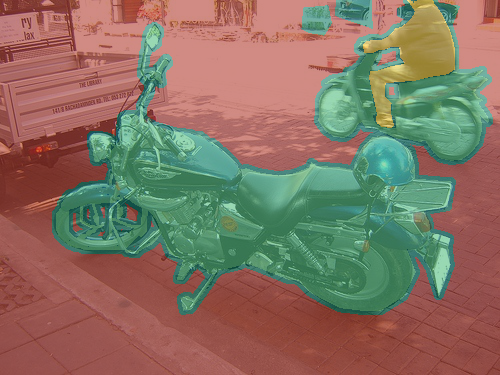

In [37]:
annot = np.array(Image.open(train_annotation_path_list[image_id]))
draw_segment(train_image_path_list[image_id], annot, show_background=True)

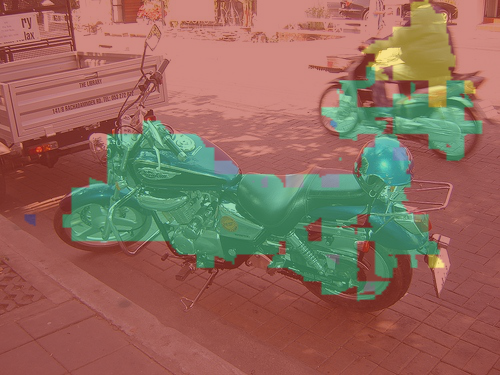

In [38]:
draw_segment(train_image_path_list[image_id], pred, show_background=True)

In [28]:
annot = np.array(Image.fromarray(annot).resize((448, 448)))

In [12]:
evaluator = EvaluatorSegmentation([pred], [annot])

NameError: name 'EvaluatorSegmentation' is not defined

In [ ]:
evaluator.mean_iou(background_class=11)

In [ ]:
img = Image.open(train_annotation_path_list[image_id])
img.load()
img = img.convert('RGB')

In [ ]:
annot = np.array(Image.open(train_annotation_path_list[image_id]))



In [ ]:
np.array(img).shape

In [ ]:
Image.open(train_annotation_path_list[image_id]).resize((256, 256))

In [ ]:
np.array(Image.open(train_annotation_path_list[image_id]))